In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

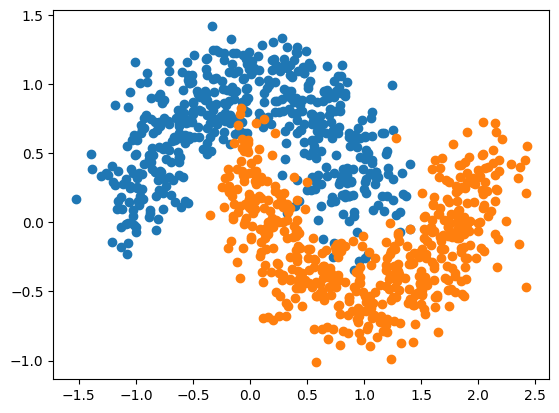

In [2]:
X, y = make_moons(n_samples=1000, noise=0.2)
xAxis1, yAxis1,xAxis2, yAxis2= X[y==0, 0], X[y==0, 1], X[y==1, 0], X[y==1, 1]
plt.scatter(xAxis1, yAxis1,marker="o")
plt.scatter(xAxis2, yAxis2,marker="o")
plt.show()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.39733033 -0.54782051]
 [-1.08272253  0.70809105]
 [-0.10340509 -1.22163405]
 ...
 [-0.29631684 -1.14350459]
 [ 1.36066609 -0.42459554]
 [-0.7165563   1.84327044]]


In [4]:
class MLP(torch.nn.Module): 
    def __init__(self): 
        super(MLP, self).__init__() 
        self.linear1 = torch.nn.Linear(2, 16) 
        self.linear2 = torch.nn.Linear(16, 1) 
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
  
    def forward(self, x): 
        out = self.linear1(x) 
        out = self.relu(out) 
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out 


In [5]:
mlp = MLP()
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [6]:

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr = 0.01)


In [7]:
error = []
for epoch in range(1000):
    mlp.train()
    optimizer.zero_grad()
    pred_y = mlp(X_train).squeeze()
    loss = criterion(pred_y, y_train)
    loss.backward()
    optimizer.step()
    error.append(loss.item())
    if (epoch + 100) % 100 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.7459968328475952
epoch 100, loss 0.2431824654340744
epoch 200, loss 0.1498798429965973
epoch 300, loss 0.10098124295473099
epoch 400, loss 0.08590921759605408
epoch 500, loss 0.07989991456270218
epoch 600, loss 0.07635384798049927
epoch 700, loss 0.0741749256849289
epoch 800, loss 0.07066218554973602
epoch 900, loss 0.06888183206319809


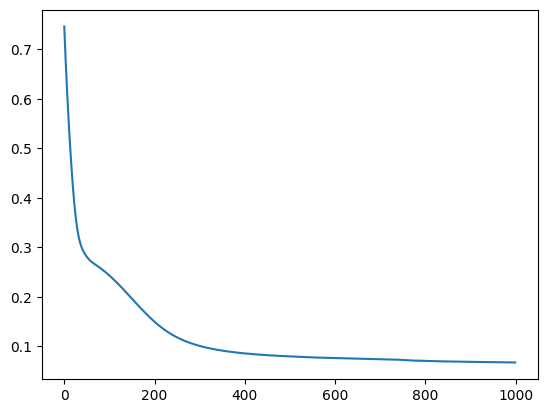

In [8]:
plt.plot(error)
plt.show()

In [9]:
mlp.eval()
y_pred_train = torch.round(torch.flatten(mlp(X_train))).detach().numpy()
y_pred_test = torch.round(torch.flatten(mlp(X_test))).detach().numpy()

y_train = y_train.detach().numpy()
y_test = y_test.detach().numpy()



print("The accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("The accuracy score for testing data is ", accuracy_score(y_test, y_pred_test))


print("The f1 score for training data is ", f1_score(y_train, y_pred_train))
print("The f1 score for testing data is ", f1_score(y_test, y_pred_test))


The accuracy score for training data is  0.97
The accuracy score for testing data is  0.97
The f1 score for training data is  0.9703703703703703
The f1 score for testing data is  0.968421052631579


In [10]:
min_X, max_X, min_y, max_y = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:,1].max()

x_range, y_range = np.arange(min_X, max_X, 0.01), np. arange(min_y, max_y, 0.01)
xx, yy = np.meshgrid(x_range, y_range)
mesh = np.c_[xx.ravel(), yy.ravel()]
mesh = scaler.transform(mesh)
mesh = torch.tensor(mesh, dtype=torch.float32)
print(xx.shape)


(244, 396)


[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


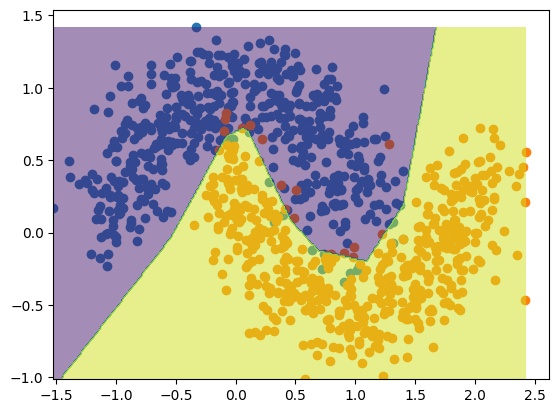

In [11]:
mlp.eval()
Z = torch.round(torch.flatten(mlp(mesh))).detach().numpy()
Z= Z.reshape(xx.shape)
print(Z)
plt.scatter(xAxis1, yAxis1,marker="o")
plt.scatter(xAxis2, yAxis2,marker="o")
plt.contourf(xx, yy, Z, alpha=0.5)
plt.show()